In [1]:


# Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [2]:
# Dataset Paths
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

In [3]:

# Load Data from Folders
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 30 images belonging to 4 classes.
Found 30 images belonging to 4 classes.


In [4]:
# Building the Custom ResNet Model
def build_resnet_model(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(
        include_top=False, weights=None, input_shape=input_shape
    )
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [5]:

# Define Model Parameters
input_shape = (150, 150, 3)
num_classes = len(train_data.class_indices)  # Number of classes

# Build and Compile the Model
model = build_resnet_model(input_shape, num_classes)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Train the Model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 68s 68s/step - accuracy: 0.2000 - loss: 2.8449 - val_accuracy: 0.3333 - val_loss: 1.3403
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.3333 - loss: 2.3972 - val_accuracy: 0.2000 - val_loss: 1.3477
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.3667 - loss: 2.5282 - val_accuracy: 0.6000 - val_loss: 1.3277
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.4000 - loss: 2.7771 - val_accuracy: 0.3333 - val_loss: 1.3114
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5333 - loss: 3.3430 - val_accuracy: 0.3333 - val_loss: 1.3130
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.7333 - loss: 1.1945 - val_accuracy: 0.3333 - val_loss: 1.3306
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5333 - loss: 2.8578 - val_accuracy: 0.3333 - val_loss: 1.3863
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.7000 - loss: 1.4263 - val_accuracy: 0.3333 - val_loss: 1.5261
Epoch 9/10


In [7]:
# Evaluate the Model
results = model.evaluate(test_data)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 1.6211
Test Accuracy: 33.33%


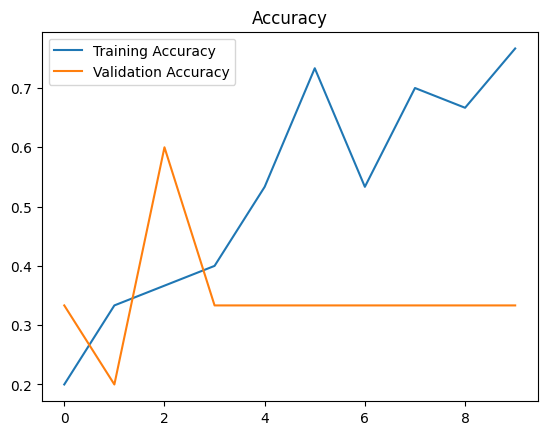

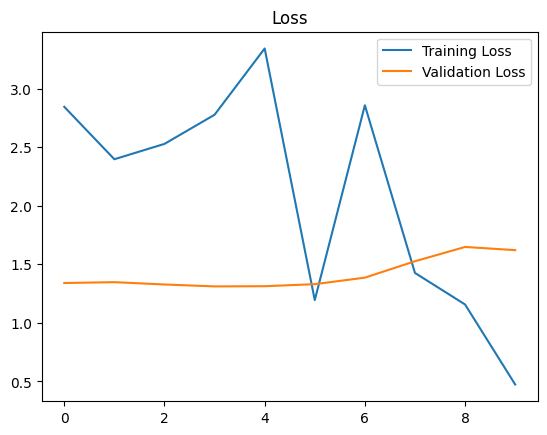

In [8]:
# Plot Accuracy and Loss Graphs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [9]:
# Save the Model for Future Use
model.save("medicinal_plant_resnet_model.h5")

In [10]:
# Load the Model and Make Predictions
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_names = list(train_data.class_indices.keys())
    return class_names[predicted_class[0]]

In [14]:
# Example Prediction
image_path = "/content/dataset/train/Ashoka/40.jpg"
loaded_model = tf.keras.models.load_model("medicinal_plant_resnet_model.h5")
predicted_plant = predict_image(image_path, loaded_model)
print(f"Predicted Plant: {predicted_plant}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Plant: Alovera


In [15]:
print("Class Indices:", train_data.class_indices)


Class Indices: {'.ipynb_checkpoints': 0, 'Alovera': 1, 'Amla': 2, 'Ashoka': 3}


In [16]:
!rm -rf /content/dataset/train/.ipynb_checkpoints
!rm -rf /content/dataset/test/.ipynb_checkpoints

In [17]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [18]:
print("Class Indices:", train_data.class_indices)

Class Indices: {'Alovera': 0, 'Amla': 1, 'Ashoka': 2}


In [27]:
image_path = "/content/dataset/train/Ashoka/40.jpg"  # Replace with a test image
predicted_plant = predict_image(image_path, loaded_model)
print(f"Predicted Plant: {predicted_plant}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Predicted Plant: Amla


In [28]:
print("Class Indices:", train_data.class_indices)

Class Indices: {'Alovera': 0, 'Amla': 1, 'Ashoka': 2}


In [29]:
from PIL import Image
img = Image.open("/content/dataset/test/Ashoka/40.jpg")
print(img.mode, img.size)

RGB (600, 450)


In [30]:
def predict_image_verbose(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_names = list(train_data.class_indices.keys())
    return predictions, class_names[predicted_class[0]]

predictions, predicted_class = predict_image_verbose(image_path, loaded_model)
print(f"Raw Predictions: {predictions}")
print(f"Predicted Plant: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Raw Predictions: [[0.0458919  0.68570757 0.05141246 0.216988  ]]
Predicted Plant: Amla


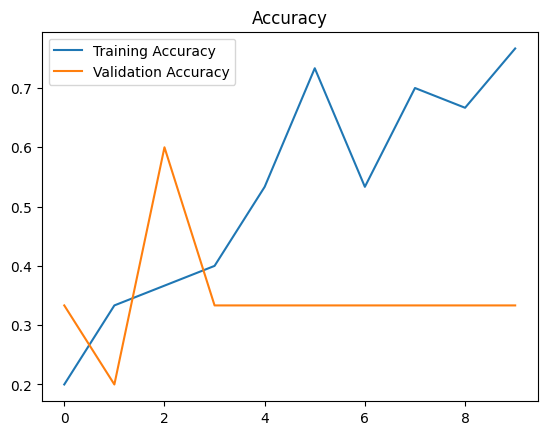

In [31]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [32]:
import os
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    print(f"Class: {folder}, Images: {len(os.listdir(folder_path))}")

Class: Amla, Images: 10
Class: Ashoka, Images: 10
Class: Alovera, Images: 10


In [33]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [35]:
history = model.fit(
    train_data,
    epochs=20,  # Increase the number of epochs
    validation_data=test_data
)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-34-7ffd103af6c0>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1721, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1474, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 597, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[30,4] labels_size=[30,3]
	 [[{{node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_one_step_on_iterator_80019]

In [36]:
print("Class Indices:", train_data.class_indices)

Class Indices: {'Alovera': 0, 'Amla': 1, 'Ashoka': 2}


In [37]:
import shutil

checkpoints_path_train = "/content/dataset/train/.ipynb_checkpoints"
checkpoints_path_test = "/content/dataset/test/.ipynb_checkpoints"

if os.path.exists(checkpoints_path_train):
    shutil.rmtree(checkpoints_path_train)
if os.path.exists(checkpoints_path_test):
    shutil.rmtree(checkpoints_path_test)

In [38]:
num_classes = len(train_data.class_indices)  # Should be 3 after cleanup
model = build_resnet_model(input_shape, num_classes)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data
)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64s/step - accuracy: 0.4333 - loss: 1.4184

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 69s 69s/step - accuracy: 0.4333 - loss: 1.4184 - val_accuracy: 0.3333 - val_loss: 1.0957
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.4333 - loss: 2.9949 - val_accuracy: 0.6333 - val_loss: 1.0919
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.3667 - loss: 3.3410 - val_accuracy: 0.3333 - val_loss: 1.0939
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5333 - loss: 2.8029 - val_accuracy: 0.3333 - val_loss: 1.0985
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.5000 - loss: 1.9111 - val_accuracy: 0.3333 - val_loss: 1.1171
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.6333 - loss: 1.1133 - val_accuracy: 0.3333 - val_loss: 1.1660
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.7667 - loss: 0.9548 - val_accuracy: 0.3333 - val_loss: 1.2140
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5333 - loss: 2.1192 - val_accuracy: 0.3333 - val_loss: 1.3577
Epoch 9/20


In [41]:
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_names = list(train_data.class_indices.keys())
    return predictions, class_names[predicted_class[0]]  # Return both predictions and class name

In [42]:
image_path = "/content/dataset/test/Ashoka/40.jpg"
predictions, predicted_plant = predict_image(image_path, model)

# Print the outputs
print(f"Raw Predictions: {predictions}")
print(f"Predicted Plant: {predicted_plant}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Raw Predictions: [[3.4798495e-02 9.6515965e-01 4.1915562e-05]]
Predicted Plant: Amla
